In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("snsdata1.csv")

In [8]:
df

,grad year,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2006,F,18.240,28,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4562,2006,F,18.628,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4563,2006,F,18.987,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4564,2006,F,18.861,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 0 to 4565
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   grad year     4566 non-null   int64  
 1   gender        4131 non-null   object 
 2   age           3840 non-null   float64
 3   friends       4566 non-null   int64  
 4   basketball    4566 non-null   int64  
 5   football      4566 non-null   int64  
 6   soccer        4566 non-null   int64  
 7   softball      4566 non-null   int64  
 8   volleyball    4566 non-null   int64  
 9   swimming      4566 non-null   int64  
 10  cheerleading  4566 non-null   int64  
 11  baseball      4566 non-null   int64  
 12  tennis        4566 non-null   int64  
 13  sports        4566 non-null   int64  
 14  cute          4566 non-null   int64  
 15  sex           4566 non-null   int64  
 16  sexy          4566 non-null   int64  
 17  hot           4566 non-null   int64  
 18  kissed        4566 non-null 

In [10]:
df.isnull().sum()

grad year         0
gender          435
age             726
friends           0
basketball        0
football          0
soccer            0
softball          0
volleyball        0
swimming          0
cheerleading      0
baseball          0
tennis            0
sports            0
cute              0
sex               0
sexy              0
hot               0
kissed            0
dance             0
band              0
marching          0
music             0
rock              0
god               0
church            0
jesus             0
bible             0
hair              0
dress             0
blonde            0
mall              0
shopping          0
clothes           0
hollister         0
abercrombie       0
die               0
death             0
drunk             0
drugs             0
dtype: int64

In [11]:
df["gender"].fillna(value="other",inplace = True)

In [13]:
print(df["age"].median())
df["age"].describe()


18.678


count    3840.000000
mean       19.149429
std         6.388005
min         5.194000
25%        18.379000
50%        18.678000
75%        18.987750
max       106.927000
Name: age, dtype: float64

In [14]:
df["age"].fillna(value = df["age"].median(),inplace = True)

In [20]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.06,.07,.08,.09,.1,.91,.92,.93,.94,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,6%,...,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
grad year,4566.0,2006.000000,0.000000,2006.000,2006.0000,2006.000,2006.00000,2006.000,2006.000,2006.000,...,2006.000,2006.000,2006.000,2006.0000,2006.00000,2006.000,2006.00000,2006.0000,2006.00000,2006.000
age,4566.0,19.074471,5.860598,5.194,16.9243,17.725,17.95485,18.026,18.073,18.114,...,19.217,19.239,19.261,19.3055,19.37225,19.455,19.54015,19.7287,20.14945,106.927
friends,4566.0,26.120456,32.065369,0.000,0.0000,0.000,0.00000,0.000,0.000,0.000,...,69.000,73.000,76.000,81.1000,87.00000,93.400,103.00000,118.0000,145.00000,373.000
basketball,4566.0,0.211345,0.759756,0.000,0.0000,0.000,0.00000,0.000,0.000,0.000,...,1.000,1.000,1.000,1.0000,1.00000,1.000,2.00000,2.0000,3.00000,22.000
football,4566.0,0.228866,0.686250,0.000,0.0000,0.000,0.00000,0.000,0.000,0.000,...,1.000,1.000,1.000,1.0000,1.00000,2.000,2.00000,2.0000,3.00000,10.000
soccer,4566.0,0.150898,0.699715,0.000,0.0000,0.000,0.00000,0.000,0.000,0.000,...,0.000,0.000,1.000,1.0000,1.00000,1.000,2.00000,2.0000,3.00000,14.000
softball,4566.0,0.105125,0.596364,0.000,0.0000,0.000,0.00000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0000,1.00000,1.000,1.00000,2.0000,3.00000,12.000
volleyball,4566.0,0.091108,0.493573,0.000,0.0000,0.000,0.00000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0000,1.00000,1.000,1.00000,1.0000,2.00000,11.000
swimming,4566.0,0.101183,0.399686,0.000,0.0000,0.000,0.00000,0.000,0.000,0.000,...,0.000,0.800,1.000,1.0000,1.00000,1.000,1.00000,1.0000,2.00000,7.000
cheerleading,4566.0,0.073587,0.440371,0.000,0.0000,0.000,0.00000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0000,0.00000,1.000,1.00000,1.0000,2.00000,9.000


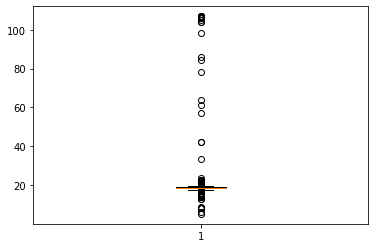

In [18]:
plt.boxplot(df["age"])
plt.show()

In [21]:
df["age"] = np.where(df["age"]>19.68,19.68,df["age"])
df["age"] = np.where(df["age"]<17.68,17.68,df["age"])

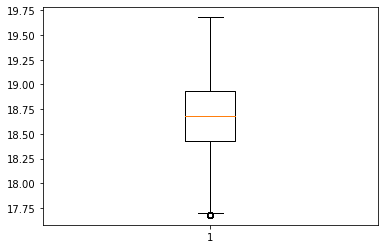

In [22]:
plt.boxplot(df["age"])
plt.show()

In [23]:
df["age"] = round(df["age"])

In [24]:
df

,grad year,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,19.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,19.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.0,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,19.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,other,19.0,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2006,F,18.0,28,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4562,2006,F,19.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4563,2006,F,19.0,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4564,2006,F,19.0,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
km = KMeans()

In [41]:
df["gender"].unique()

array([1, 0, 2], dtype=object)

In [35]:
df["gender"] = np.where(df["gender"]=="M",1,df["gender"])

In [38]:
df["gender"] = np.where(df["gender"]=="F",0,df["gender"])

In [40]:
df["gender"] = np.where(df["gender"]=="other",2,df["gender"])

In [42]:
km.fit(df)

KMeans()

In [43]:
km.inertia_

246188.4290022018

In [54]:
for i in range(3,15):
    kn = KMeans(n_clusters=i)
    kn.fit(df)
    print("n_clusters {} and intertia  is {}".format(i,kn.inertia_))

n_clusters 3 and intertia  is 1066142.7465572446
n_clusters 4 and intertia  is 682866.3653356942
n_clusters 5 and intertia  is 491141.3792458649
n_clusters 6 and intertia  is 361581.04172475816
n_clusters 7 and intertia  is 290278.74894849764
n_clusters 8 and intertia  is 246069.1515003235
n_clusters 9 and intertia  is 213355.57614044897
n_clusters 10 and intertia  is 188100.61417295557
n_clusters 11 and intertia  is 169563.40566690726
n_clusters 12 and intertia  is 156710.57322199427
n_clusters 13 and intertia  is 145088.9046131871
n_clusters 14 and intertia  is 134972.14316085368


In [55]:
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

In [56]:
km.inertia_

1069645.2803389407

In [58]:
pd.DataFrame(km.labels_).value_counts()

2    2826
0    1439
1     301
dtype: int64

In [60]:
km = KMeans(n_clusters=4)
km.fit(df)
km.inertia_

682601.3171856374

In [62]:
km.labels_[0:10]

array([0, 0, 1, 0, 0, 3, 1, 0, 2, 2])

In [64]:
pd.DataFrame(km.labels_).value_counts()

0    2476
2    1438
1     555
3      97
dtype: int64

In [65]:
wcss = []
for i in range(3,15):
    kn = KMeans(n_clusters=i)
    kn.fit(df)
    print("n_clusters {} and intertia  is {}".format(i,kn.inertia_))
    wcss.append(kn.inertia_)

n_clusters 3 and intertia  is 1066142.7465572446
n_clusters 4 and intertia  is 682601.3171856374
n_clusters 5 and intertia  is 491593.56211807835
n_clusters 6 and intertia  is 361776.6013331601
n_clusters 7 and intertia  is 290369.2683089954
n_clusters 8 and intertia  is 245933.31719753792
n_clusters 9 and intertia  is 212419.17007619093
n_clusters 10 and intertia  is 188265.0297842789
n_clusters 11 and intertia  is 169829.3586450644
n_clusters 12 and intertia  is 157614.87222502154
n_clusters 13 and intertia  is 143185.61588676428
n_clusters 14 and intertia  is 135080.42332915933


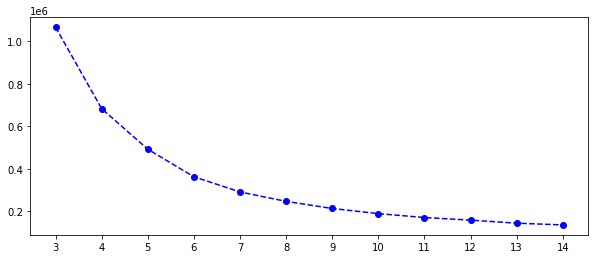

In [71]:
plt.figure(figsize=(10,4))
plt.plot(range(3,15),wcss,"bo--")
plt.xticks(range(3,15))
plt.show()